In [1]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
# Importing dataset
import pandas as pd
df = pd.read_excel(r"C:\Users\Rahul\Desktop\customer_retention_dataset.xlsx")
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,Delhi,110030,5,5,2,1,2,3,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,Greater Noida,201308,4,5,3,1,4,2,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,Karnal,132001,4,1,3,1,4,3,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,Bangalore,530068,3,2,2,1,2,3,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,2,Solan,173212,2,1,3,1,4,2,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,1,3,Ghaziabad,201008,2,4,3,1,5,2,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,1,4,Bangalore,560010,3,1,3,2,5,1,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,1,1,Solan,173229,3,1,2,1,4,2,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [5]:
df.shape

(269, 71)

In [ ]:
#Their are 100 rows and 40 columns in dataset

In [5]:
#for displaying max. rows
pd.set_option('display.max_rows', None)

In [6]:
# checking Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    int64 
 1   2 How old are you?                                                                                                                                                                    

In [7]:
#checking datatype
df.dtypes

1Gender of respondent                                                    int64
2 How old are you?                                                       int64
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                               int64
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [ ]:
#Two types of data type present in dataset. 1. object, 2. integer

In [8]:
#checking null values
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

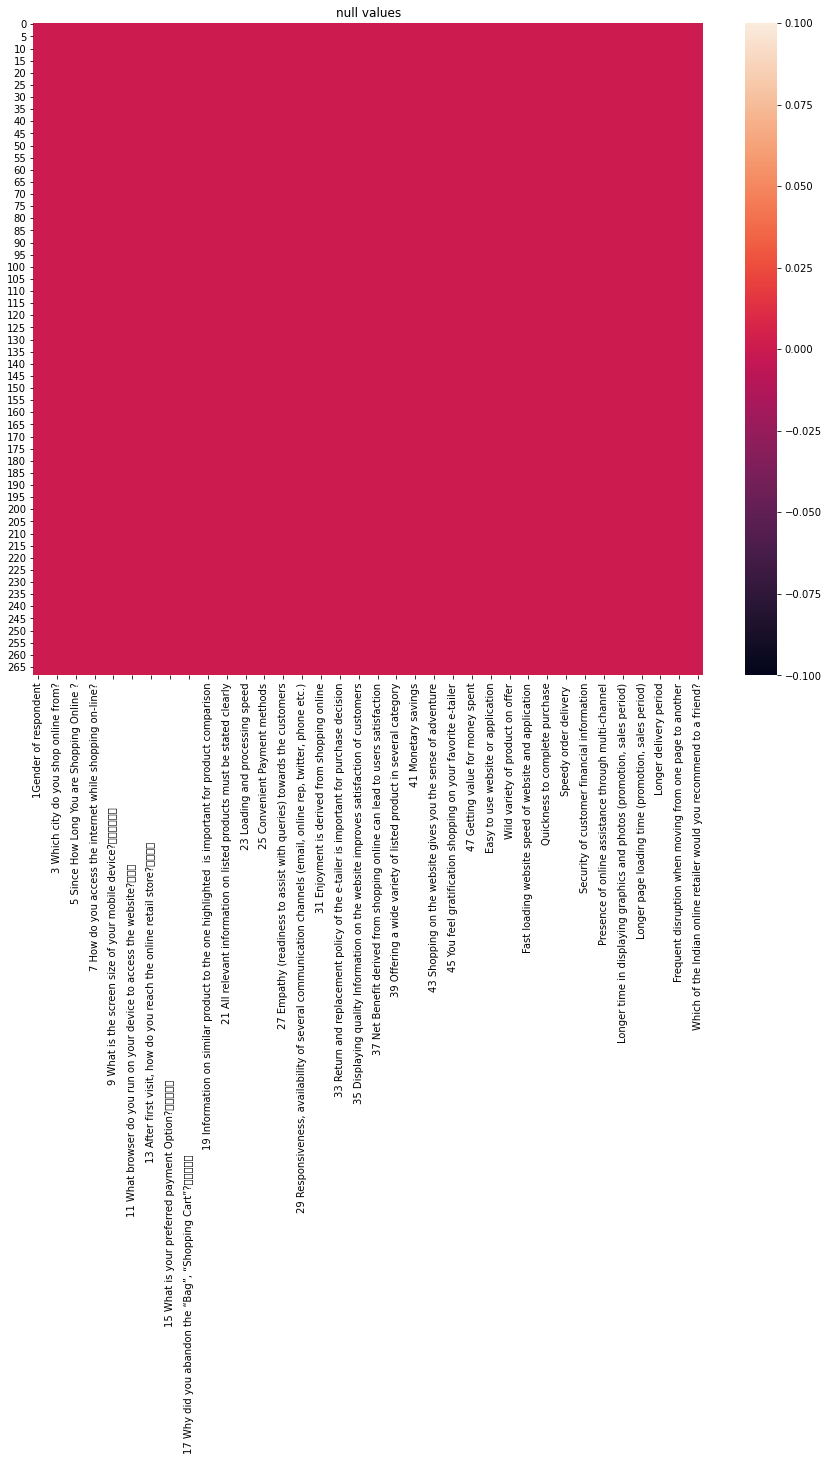

In [9]:
#Heatmap for checking null values
plt.figure(figsize = [15,12])
sns.heatmap(df.isnull())
plt.title("null values")
plt.show()

In [ ]:
#columns does'nt have any null values but col. name-_c39 have all null values, hence dropping it

In [10]:
#checking columns name
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [11]:
#multivariate analysis
corr_mat=df.corr()
corr_mat

,1Gender of respondent,2 How old are you?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,...,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent
1Gender of respondent,1.000000,-0.034449,0.260696,-0.046005,0.076121,-0.200974,-0.241847,-0.058760,-0.038207,-0.116712,...,0.097540,0.152595,0.357061,0.201673,0.198382,-0.005218,-0.046397,0.018482,-0.113160,0.202014
2 How old are you?,-0.034449,1.000000,-0.057393,0.014049,0.005089,0.024228,0.292176,0.227841,-0.133597,-0.151708,...,-0.094664,0.035895,0.082622,-0.056316,0.035612,-0.002979,-0.176643,-0.203841,-0.121404,0.052869
4 What is the Pin Code of where you shop online from?,0.260696,-0.057393,1.000000,0.092980,-0.021229,0.134879,-0.103424,-0.189814,0.077905,0.063588,...,-0.072355,0.073624,0.067628,0.162374,0.160860,0.025634,-0.240597,0.018836,-0.139511,0.127763
5 Since How Long You are Shopping Online ?,-0.046005,0.014049,0.092980,1.000000,0.291104,0.080738,0.309634,0.118596,-0.141768,-0.236578,...,0.063752,0.006272,0.157118,-0.031713,-0.014764,0.111851,-0.026515,-0.047239,0.174400,0.175901
6 How many times you have made an online purchase in the past 1 year?,0.076121,0.005089,-0.021229,0.291104,1.000000,0.135034,0.057656,-0.127544,0.040689,-0.153269,...,0.025346,0.204100,0.193492,0.122437,0.047127,0.175364,-0.048847,-0.009571,0.057217,0.196359
7 How do you access the internet while shopping on-line?,-0.200974,0.024228,0.134879,0.080738,0.135034,1.000000,0.068663,0.036367,-0.009826,0.029232,...,-0.054386,0.017909,-0.045458,-0.073796,-0.052147,0.065420,0.049525,-0.014762,-0.027241,-0.022531
8 Which device do you use to access the online shopping?,-0.241847,0.292176,-0.103424,0.309634,0.057656,0.068663,1.000000,0.596511,-0.561938,-0.329284,...,-0.326420,-0.163098,-0.155573,-0.313940,0.003577,-0.032400,-0.332072,-0.299548,-0.204089,-0.039320
9 What is the screen size of your mobile device?\t\t\t\t\t\t,-0.058760,0.227841,-0.189814,0.118596,-0.127544,0.036367,0.596511,1.000000,-0.775082,-0.293665,...,-0.244383,-0.231767,0.002365,-0.359693,0.125193,0.041335,0.106184,-0.453578,-0.025609,-0.295416
10 What is the operating system (OS) of your device?\t\t\t\t,-0.038207,-0.133597,0.077905,-0.141768,0.040689,-0.009826,-0.561938,-0.775082,1.000000,0.409415,...,0.243950,0.260572,-0.142491,0.471333,-0.068273,0.031740,0.139511,0.430597,0.003775,0.193282
11 What browser do you run on your device to access the website?\t\t\t,-0.116712,-0.151708,0.063588,-0.236578,-0.153269,0.029232,-0.329284,-0.293665,0.409415,1.000000,...,-0.045722,-0.075542,-0.534248,-0.159088,-0.230562,-0.325374,0.130332,0.090460,-0.131938,-0.277167


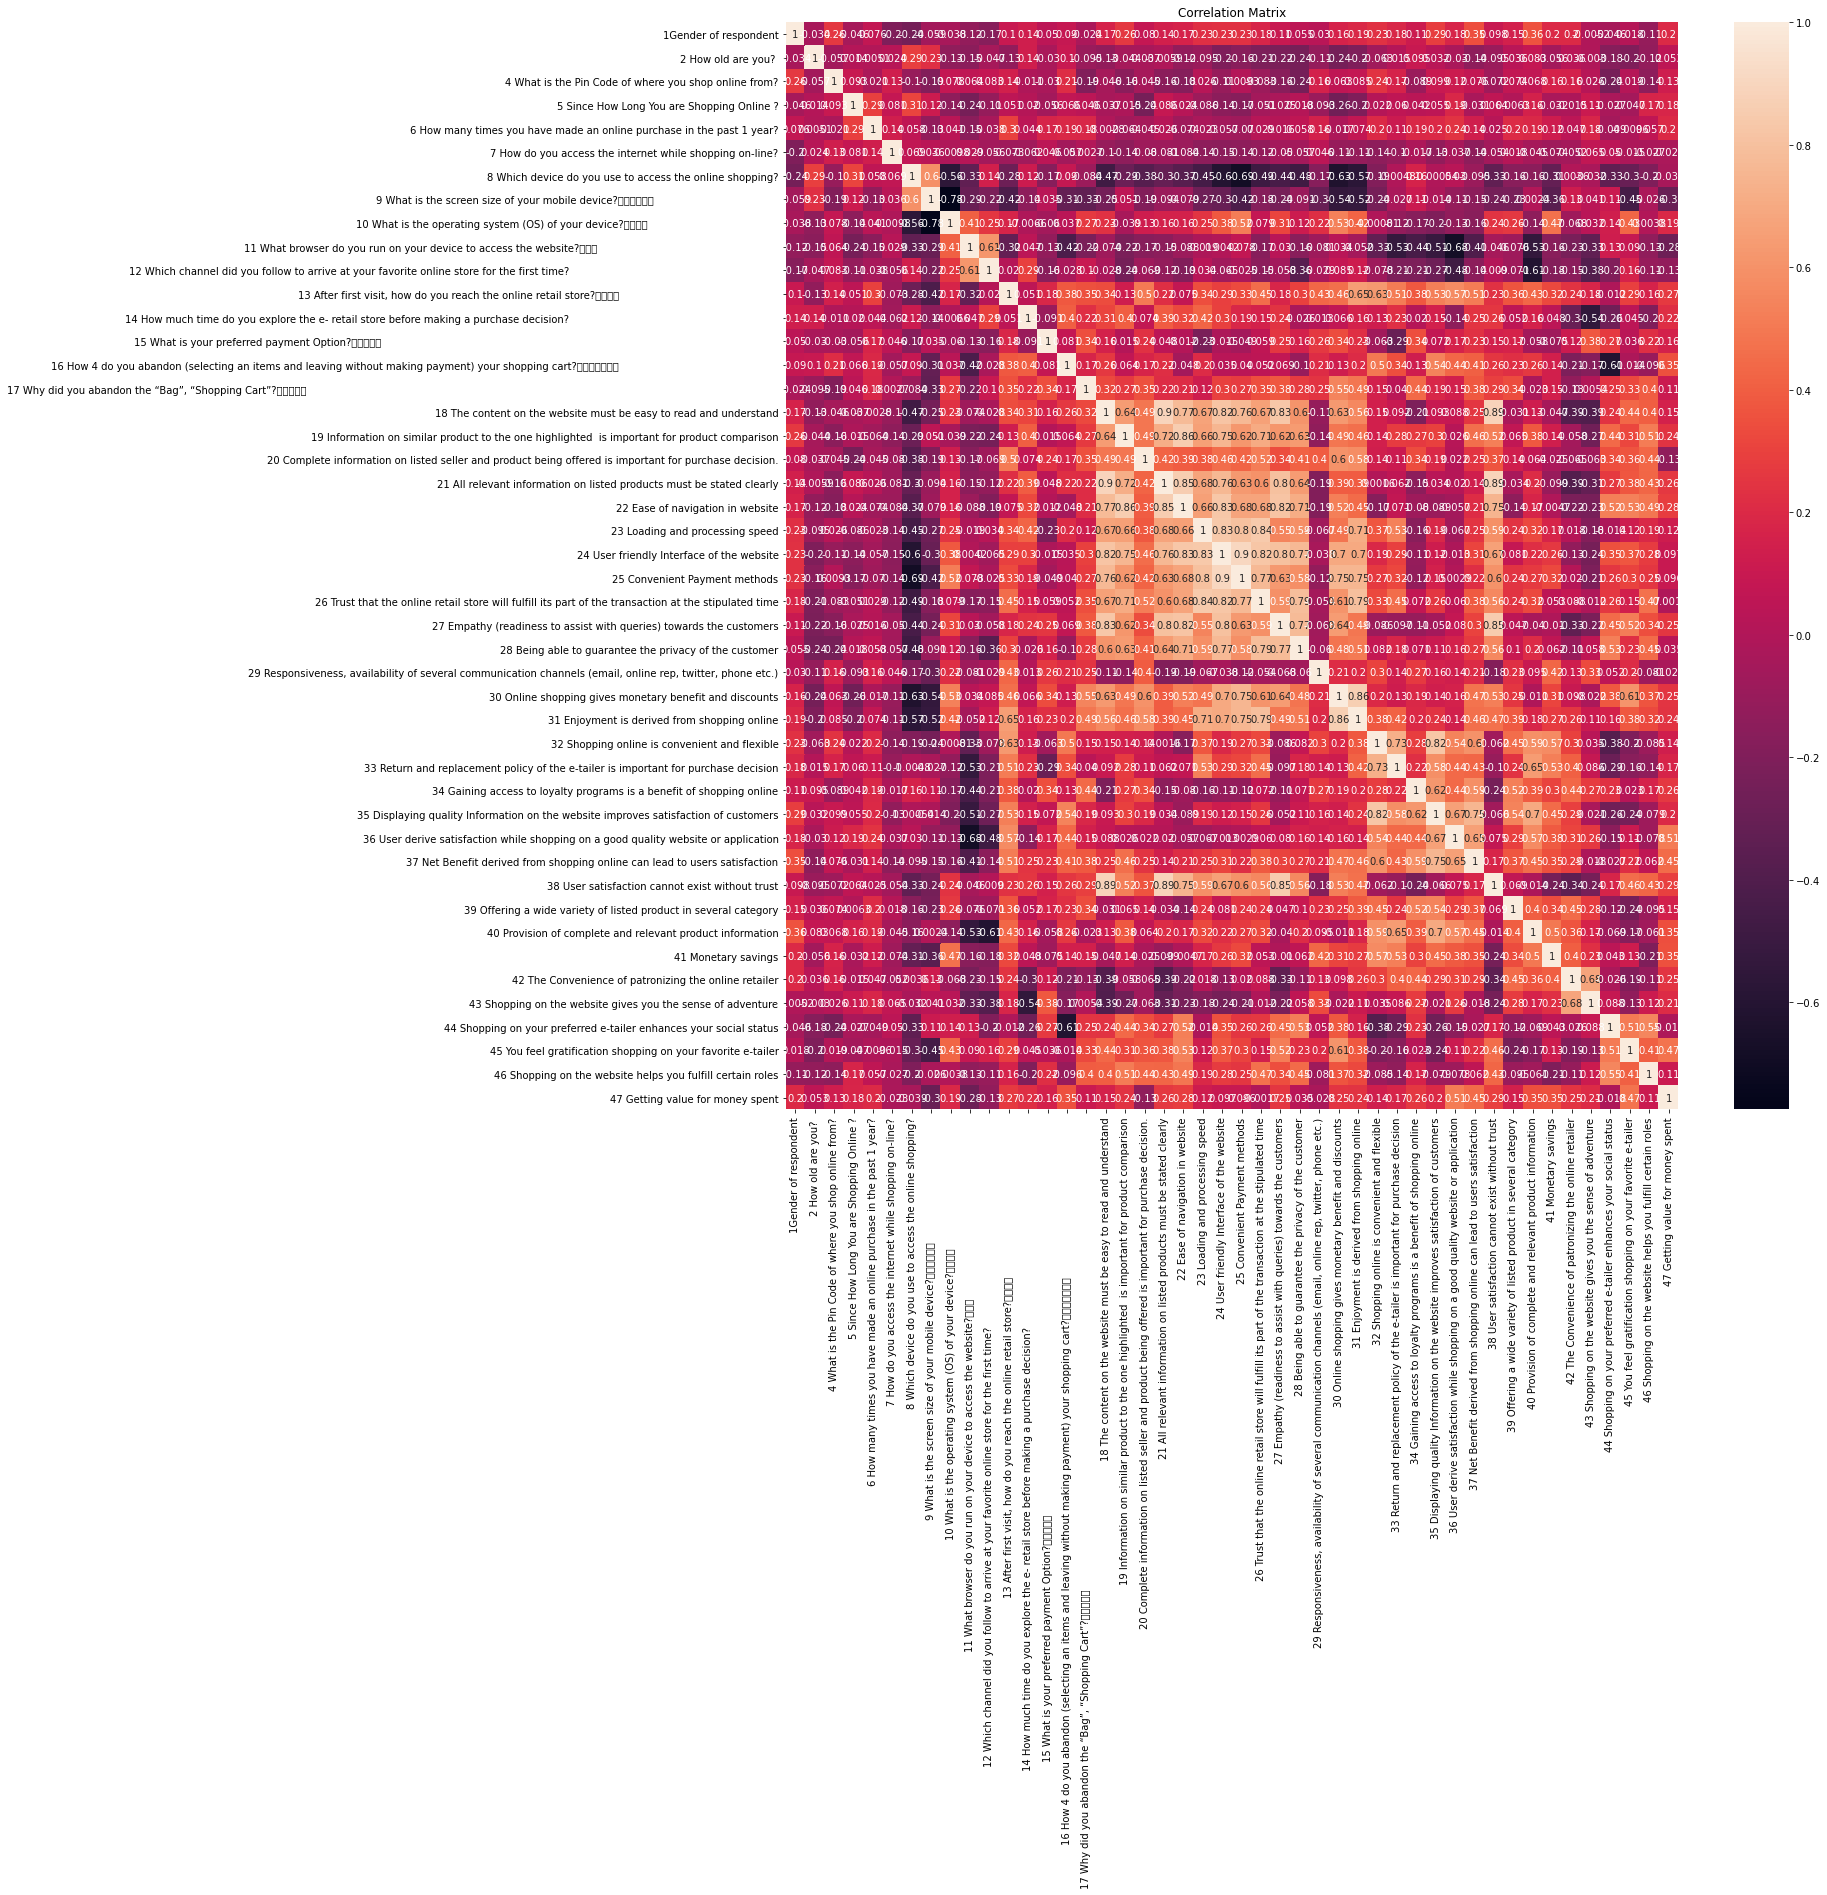

In [12]:
# heatmap for analysing correlation
plt.figure(figsize=[20,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

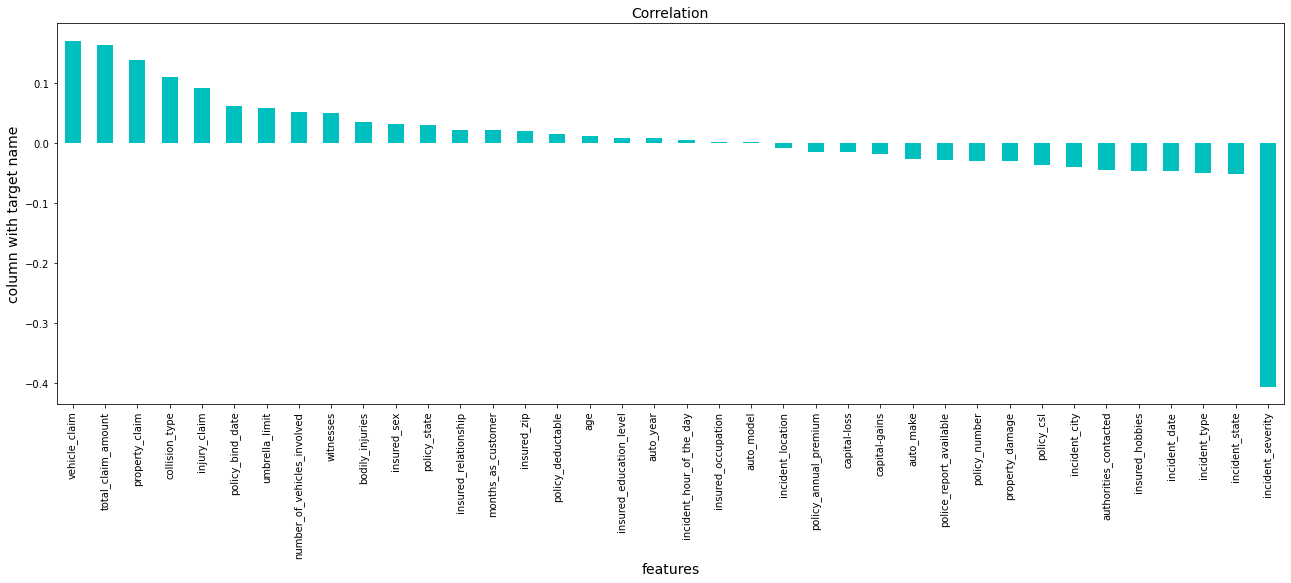

In [19]:
#plotting graph showing +ve and -ve correlation of coloumn(with target col.-primary_fuel)
plt.figure(figsize=(22,7))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='c')
plt.xlabel('features', fontsize=14)
plt.ylabel('column with target name', fontsize=14)
plt.title('Correlation', fontsize=14)
plt.show

In [13]:
df.describe()

,1Gender of respondent,2 How old are you?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,...,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.669145,2.959108,220465.747212,3.524164,2.672862,3.260223,1.676580,4.282528,1.776952,1.275093,...,4.182156,4.148699,4.349442,4.263941,3.914498,3.553903,3.223048,3.501859,3.282528,4.163569
std,0.471398,1.066012,140524.341051,1.436586,1.651788,1.135887,0.843904,0.923426,0.797892,0.645429,...,1.072162,0.842110,0.755953,1.000485,0.693879,1.065869,1.219581,1.141564,1.178995,0.648773
min,0.000000,1.000000,110008.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,0.000000,2.000000,122018.000000,3.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,3.000000,201303.000000,4.000000,2.000000,3.000000,1.000000,4.000000,2.000000,1.000000,...,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000
75%,1.000000,4.000000,201310.000000,5.000000,4.000000,5.000000,2.000000,5.000000,2.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,560037.000000,5.000000,5.000000,5.000000,4.000000,5.000000,3.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


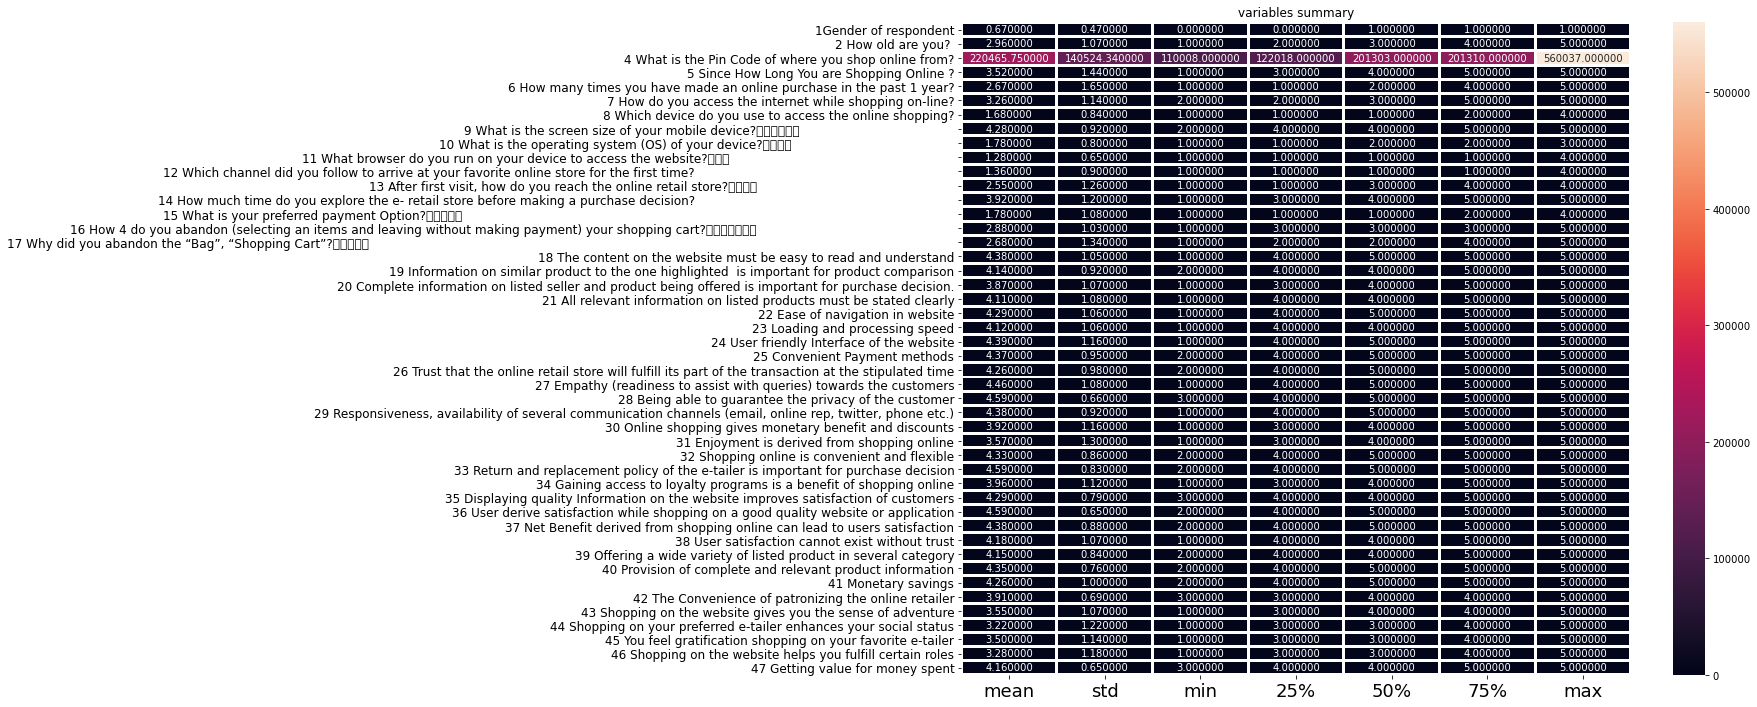

In [14]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth=2, annot=True, fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variables summary")
plt.show()

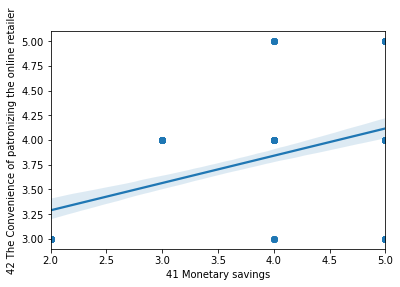

In [18]:
#plot for understanding relation between target col-capacity_mw and other cols.
ax=sns.regplot(x='41 Monetary savings', y='42 The Convenience of patronizing the online retailer',data=df)

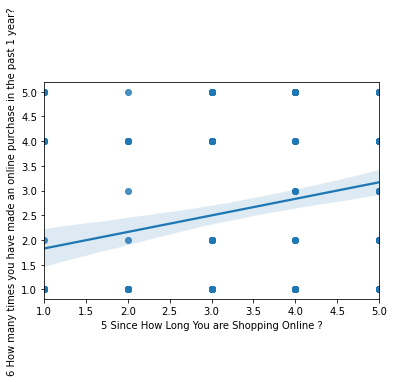

In [19]:
#plot for understanding relation between target col-capacity_mw and other cols.
ax=sns.regplot(x='5 Since How Long You are Shopping Online ?', y='6 How many times you have made an online purchase in the past 1 year?',data=df)

array([[<AxesSubplot:title={'center':'1Gender of respondent'}>,
        <AxesSubplot:title={'center':'2 How old are you? '}>,
        <AxesSubplot:title={'center':'4 What is the Pin Code of where you shop online from?'}>,
        <AxesSubplot:title={'center':'5 Since How Long You are Shopping Online ?'}>,
        <AxesSubplot:title={'center':'6 How many times you have made an online purchase in the past 1 year?'}>,
        <AxesSubplot:title={'center':'7 How do you access the internet while shopping on-line?'}>,
        <AxesSubplot:title={'center':'8 Which device do you use to access the online shopping?'}>],
       [<AxesSubplot:title={'center':'9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        '}>,
        <AxesSubplot:title={'center':'10 What is the operating system (OS) of your device?\t\t\t\t                                          '}>,
        <AxesSubplot:title={'center':'11 What browser do you run on your device to access the 

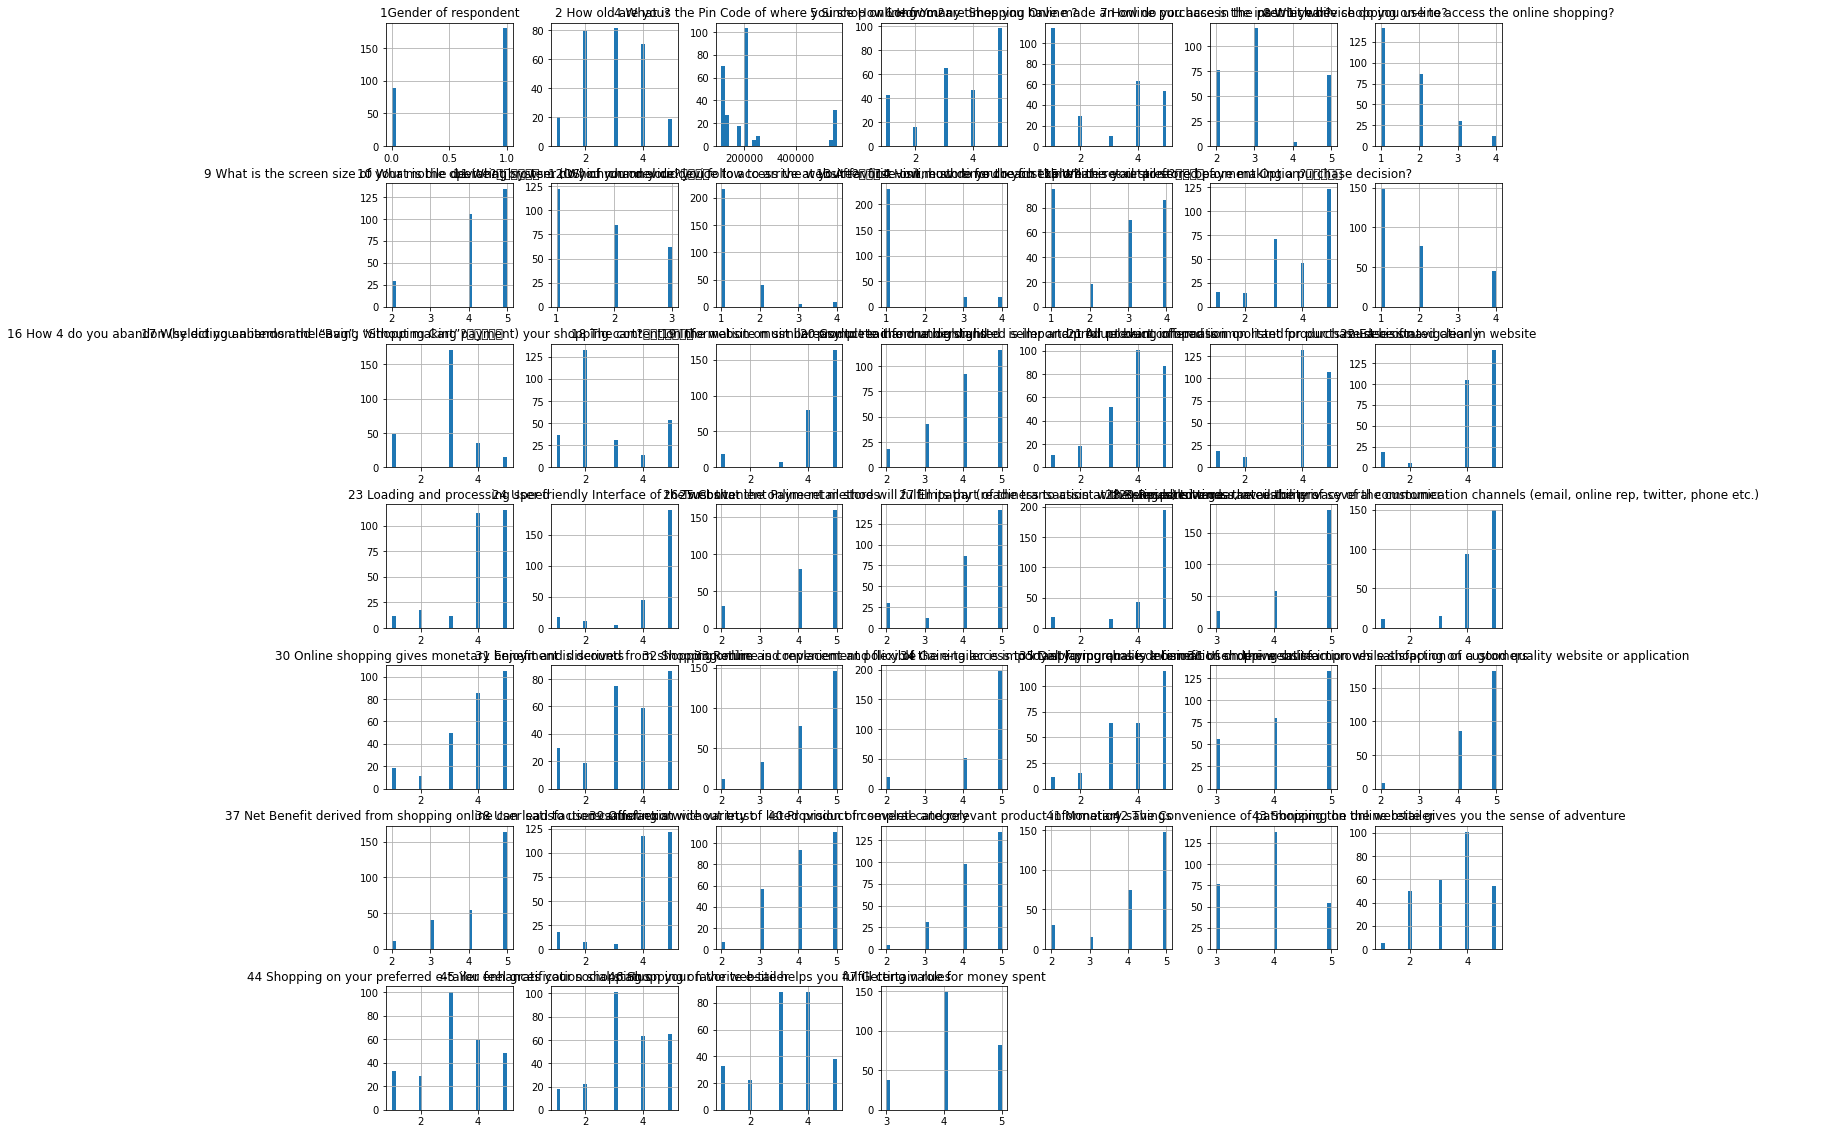

In [22]:
#plotting histogram for checking distribution-univariate analysis
df.hist(figsize=(20, 20), grid=True, bins=30)

In [23]:
##plot for understanding relation between cols.
sns.pairplot(df)
plt.show()

In [24]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 